In [29]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
import time

In [2]:
def simulate(initial_velocity,drag_coef,mass,time_step):
    """
    Function to simulate projectile motion. Considered in a 2D (x,y) plane
    beginning with projectile at (0,0) with some initial velocity and some
    air resistance force on the projectile in the x direction. Simulation
    is done using Euler's method and proceeds until projectile hits the
    ground.
    
    Inputs:
    initial_velocity - the initial velocity of the projectile (np.array)
    drag_coef        - the drag coefficient representing the object geometry (float)
    mass             - the mass of the object (float)
    time_step        - the time_step used to simulate
    
    Outputs:
    x                - the positions at each point in time
    """
    a = []
    v = []
    x = []
    
    x.append(np.array([0.0,0.01]))
    v.append(initial_velocity)
    
    g = np.array([0.0,-9.81])
    drag = np.array([drag_coef/mass, 0.0])
    
    while x[-1][1] > 0:
        a.append(g - drag*v[-1])
        x.append(x[-1] + time_step*v[-1])
        v.append(v[-1] + time_step*a[-1])
    
    # a.append(g - (b/m)*v[-1]*v[-1])
    
    return np.array(x)

In [3]:
xs = simulate(np.array([10,10]),0.2,1,.01)

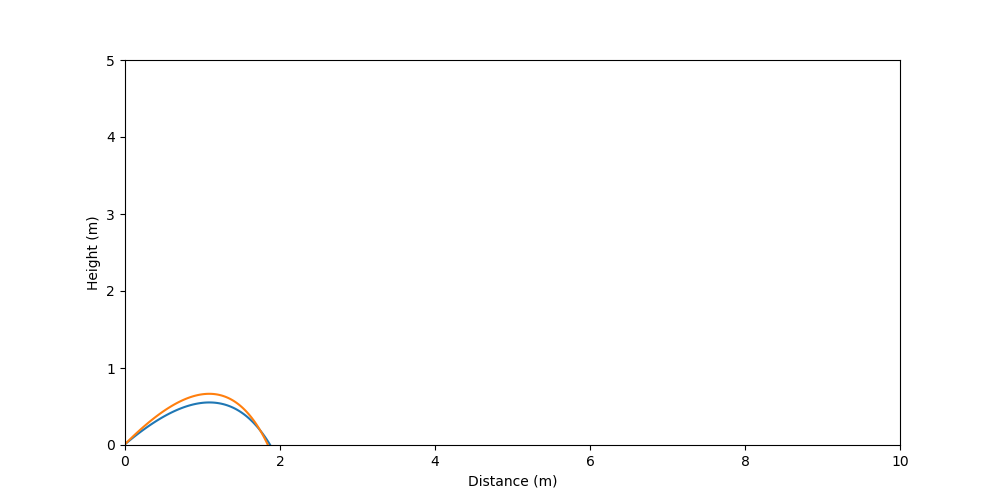

In [10]:
plt.plot(xs[:,0],xs[:,1])
plt.ylabel("Height (m)")
plt.xlabel("Distance (m)")
plt.show()

FloatSlider(value=45.0, description='Start angle', max=89.0, min=1.0, step=2.0)

FloatSlider(value=5.0, description='Initial velocity', max=10.0, min=1.0, step=0.5)

FloatSlider(value=1.0, description='Drag coefficient', max=2.0)

FloatSlider(value=1.0, description='Mass', max=10.0, min=1.0, step=0.5)

Button(description='Throw ball', style=ButtonStyle())

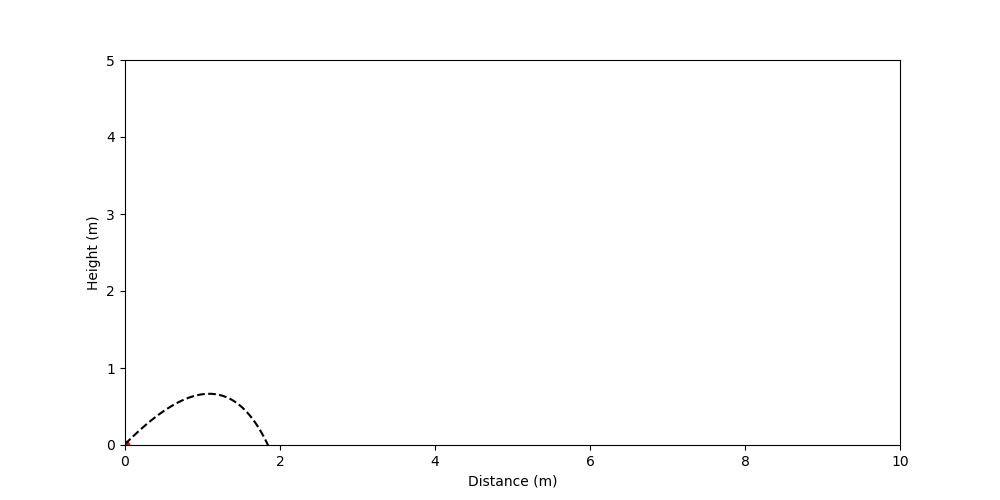

In [126]:
plt.close()
angle = widgets.FloatSlider(min=1,max=89,step=2,description="Start angle",value = 45)
magnitude = widgets.FloatSlider(min=1,max=10,step=.5,description="Initial velocity",value = 5)
drag = widgets.FloatSlider(min=0,max=2,step=.1,description="Drag coefficient",value = 1)
mass = widgets.FloatSlider(min=1,max=10,step=.5,description="Mass",value = 1)
play = widgets.Button(description="Throw ball")
display(angle)
display(magnitude)
display(drag)
display(mass)
display(play)

def plot_event(obj):
    vx = magnitude.value*np.cos(angle.value*(np.pi/180))
    vy = magnitude.value*np.sin(angle.value*(np.pi/180))
    xs = simulate(np.array([vx,vy]),drag.value,mass.value,.01)
    for x in xs:
        time1 = time.time()
        ball.set_offsets(x)
        time2 = time.time()
        time.sleep(.01 - (time2-time1))
        fig.canvas.draw()
        fig.canvas.flush_events()
        
def plot_pointer(obj):
    vx = magnitude.value*np.cos(angle.value*(np.pi/180))
    vy = magnitude.value*np.sin(angle.value*(np.pi/180))
    xs = simulate(np.array([vx,vy]),drag.value,mass.value,.01)
    traj.set_data(xs[:,0],xs[:,1])
    fig.canvas.draw_idle()
    fig.canvas.flush_events()
    
def plot_ball(obj):
    ball.set_sizes([mass.value*72])
        
fig = plt.figure(figsize=(10,5))
vx = magnitude.value*np.cos(angle.value*(np.pi/180))
vy = magnitude.value*np.sin(angle.value*(np.pi/180))
xs = simulate(np.array([vx,vy]),drag.value,mass.value,.01)
traj = plt.plot(xs[:,0],xs[:,1],ls="--",color="black")[0]
ball = plt.scatter([0],[0],color="red")
plt.ylabel("Height (m)")
plt.xlabel("Distance (m)")
plt.xlim(0,10)
plt.ylim(0,5)
fig.canvas.draw()
    
play.on_click(plot_event)
angle.observe(plot_pointer)
magnitude.observe(plot_pointer)
drag.observe(plot_pointer)
mass.observe(plot_ball)

In [41]:
plt.close()

## With wind

In [42]:
# Wind as chebyshev polynomials

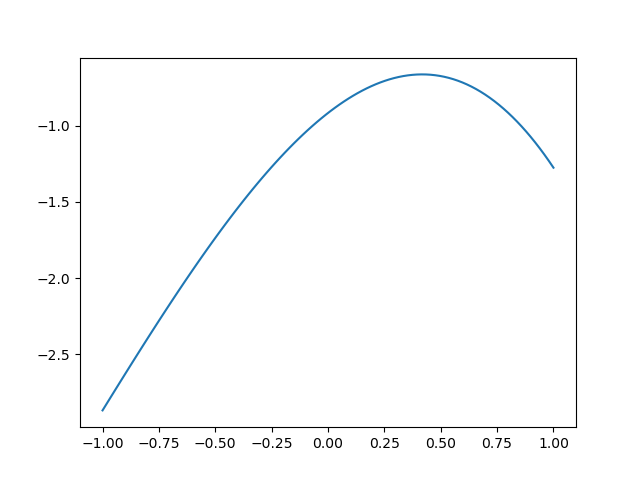

In [124]:
domain = np.linspace(-1,1,100)
n = 4

poly = np.zeros(100)
for i in range(n):
    poly += np.random.normal()*np.cos(i*np.arccos(domain))

fig = plt.figure()
plt.plot(domain, poly)
plt.show()

In [84]:
def simulate_with_wind(initial_velocity,mass,time_step,wind_variability,wind_strength):
    """
    Function to simulate projectile motion. Considered in a 2D (x,y) plane
    beginning with projectile at (0,0) with some initial velocity and some
    air resistance force on the projectile in the x direction. Simulation
    is done using Euler's method and proceeds until projectile hits the
    ground.
    
    Inputs:
    initial_velocity - the initial velocity of the projectile (np.array)
    mass             - the mass of the object (float)
    time_step        - the time_step used to simulate (float)
    wind_variability - how often the wind changes direction (integer 0-10)
    wind_strength    - how strong the wind is (float)
    
    Outputs:
    x                - the positions at each point in time
    """
    # First to find time domain (probably a better way...)
    a = []; v = []; x = []; t = [0]
    
    x.append(np.array([0.0,0.01]))
    v.append(initial_velocity)
    
    g = np.array([0.0,-9.81])
    
    while x[-1][1] > 0:
        a.append(g)
        x.append(x[-1] + time_step*v[-1])
        v.append(v[-1] + time_step*a[-1])
        t.append(t[-1] + time_step)
    
    # Wind drag
    poly_domain = np.linspace(-1,1,len(t))
    drag_coefs = np.zeros(len(t))
    for i in range(wind_variability):
        drag_coefs += wind_strength*np.random.normal()*np.cos(i*np.arccos(poly_domain))
    
    # Now to actually solve
    a = []; v = []; x = []
    
    x.append(np.array([0.0,0.01]))
    v.append(initial_velocity)
    
    g = np.array([0.0,-9.81])
    
    i = 0
    while x[-1][1] > 0:
        drag = np.array([drag_coefs[i]/mass, 0.0])
        a.append(g - drag*v[-1])
        x.append(x[-1] + time_step*v[-1])
        v.append(v[-1] + time_step*a[-1])
        i += 1
    
    return np.array(x)

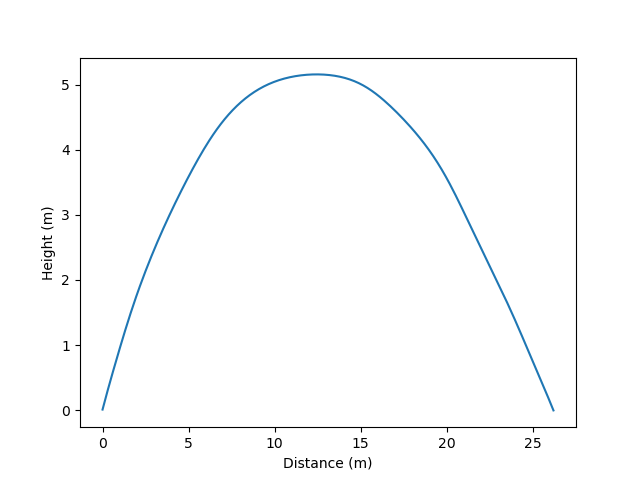

In [104]:
plt.figure()
xs = simulate_with_wind(np.array([10,10]), 10, .01, 20,3)
plt.plot(xs[:,0],xs[:,1])
plt.ylabel("Height (m)")
plt.xlabel("Distance (m)")
plt.show()

FloatSlider(value=45.0, description='Start angle', max=89.0, min=1.0, step=2.0)

FloatSlider(value=5.0, description='Initial velocity', max=10.0, min=1.0, step=0.5)

FloatSlider(value=1.0, description='Mass', max=10.0, min=1.0, step=0.5)

IntSlider(value=5, description='Wind variability', max=20)

FloatSlider(value=1.0, description='Wind strength', max=2.0)

Button(description='Throw ball', style=ButtonStyle())

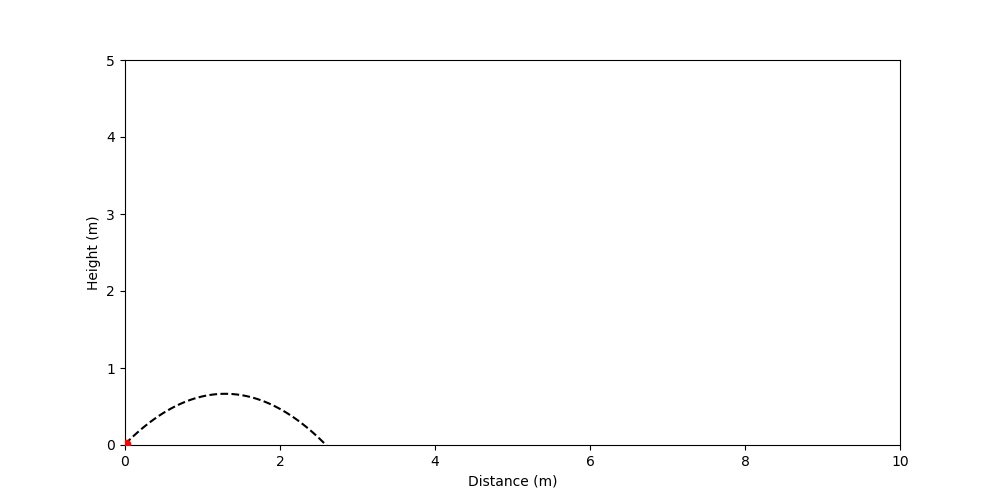

In [123]:
plt.close()
angle = widgets.FloatSlider(min=1,max=89,step=2,description="Start angle",value = 45)
magnitude = widgets.FloatSlider(min=1,max=10,step=.5,description="Initial velocity",value = 5)
mass = widgets.FloatSlider(min=1,max=10,step=.5,description="Mass",value = 1)
wind_variability = widgets.IntSlider(min=0,max=20,step=1,description="Wind variability",value = 5)
wind_strength = widgets.FloatSlider(min=0,max=2,step=.1,description="Wind strength",value = 1)
play = widgets.Button(description="Throw ball")
display(angle)
display(magnitude)
display(mass)
display(wind_variability)
display(wind_strength)
display(play)

def plot_event(obj):
    vx = magnitude.value*np.cos(angle.value*(np.pi/180))
    vy = magnitude.value*np.sin(angle.value*(np.pi/180))
    xs = simulate_with_wind(np.array([vx,vy]),mass.value,.01,wind_variability.value,wind_strength.value)
    for i in range(len(xs)):
        x = xs[i]
        time1 = time.time()
        ball.set_offsets(x)
        true_traj.set_data(xs[:i,0],xs[:i,1])
        time2 = time.time()
        time.sleep(.01 - (time2-time1))
        fig.canvas.draw()
        fig.canvas.flush_events()
        
def plot_pointer(obj):
    vx = magnitude.value*np.cos(angle.value*(np.pi/180))
    vy = magnitude.value*np.sin(angle.value*(np.pi/180))
    xs = simulate(np.array([vx,vy]),0,mass.value,.01)
    traj.set_data(xs[:,0],xs[:,1])
    fig.canvas.draw_idle()
    fig.canvas.flush_events()
    
def plot_ball(obj):
    ball.set_sizes([mass.value*72])
        
fig = plt.figure(figsize=(10,5))
vx = magnitude.value*np.cos(angle.value*(np.pi/180))
vy = magnitude.value*np.sin(angle.value*(np.pi/180))
xs = simulate(np.array([vx,vy]),0,mass.value,.01)
traj = plt.plot(xs[:,0],xs[:,1],ls="--",color="black")[0]
true_traj = plt.plot([0],[0],color="red",zorder=50)[0]
ball = plt.scatter([0.01],[0.01],color="red",zorder=100)
plt.ylabel("Height (m)")
plt.xlabel("Distance (m)")
plt.xlim(0,10)
plt.ylim(0,5)
fig.canvas.draw()
    
play.on_click(plot_event)
angle.observe(plot_pointer)
magnitude.observe(plot_pointer)
drag.observe(plot_pointer)
mass.observe(plot_ball)

In [112]:
plt.close()